### **1-understanding** **data**

In this notebook we will create a a machine learning model to predict supermarket sales based on historical sales data and other relevant factors, we will start by going through a complete Data Analysis on supermarket dataset available.

Go through the data;
perform an exploratory data analysis;
Point out conclusions in every step of analysis;
data visualization (matplotlib and seaborn) to answear questions;
Apply a predictive point of view for helping supermarket predict sales
Using this predictive approach for predicting the furure sales

##**2-import libraries**

In [ ]:
# Standard libraries
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
from collections import Counter
from PIL import Image

# Viz libs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec


# ML libs
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#linear regression, decision trees, random forests, or gradient boosting algorithms.

##**3- Data Exploration**

In [ ]:
df= pd.read_csv("/content/supermarket_sales - Sheet1.csv")

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df['Invoice ID'].value_counts()

Invoice ID
750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: count, Length: 1000, dtype: int64

In [ ]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [ ]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [ ]:
df['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

In [ ]:
df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [ ]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


##**4-data cleaning:**

In [ ]:
# try to find duplicate columns
duplicates = df.T.duplicated()

# Get the duplicate column names
duplicate_columns = df.columns[duplicates]

# Print the duplicate column names
print(duplicate_columns)

Index(['gross income'], dtype='object')


##missing data

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

##**outliers**

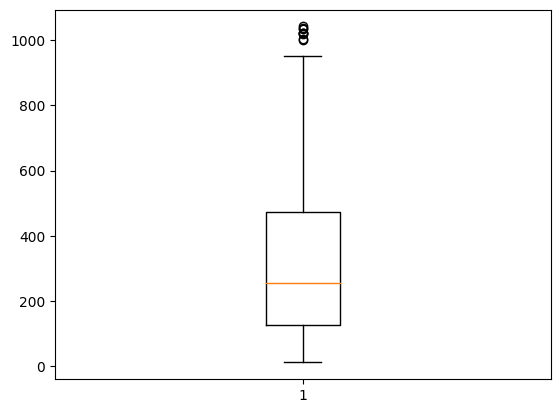

In [ ]:
plt.boxplot(df1['Total'])
plt.show()

In [ ]:
df1[df1["Total"]>1000]

,Branch_1,Branch_2,Branch_3,City_1,City_2,City_3,Customer type_1,Customer type_2,Gender_1,Gender_2,Product line_1,Product line_2,Product line_3,Product line_4,Product line_5,Product line_6,Unit price,Quantity,Tax 5%,Total,Payment_1,Payment_2,Payment_3,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,Hour
166,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,95.58,10,47.790,1003.590,0,1,0,955.8,4.761905,47.790,4.8,2,1,13
167,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,98.98,10,49.490,1039.290,0,0,1,989.8,4.761905,49.490,8.7,4,2,16
350,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,99.30,10,49.650,1042.650,0,0,1,993.0,4.761905,49.650,6.6,4,2,14
357,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,95.44,10,47.720,1002.120,0,1,0,954.4,4.761905,47.720,5.2,2,1,13
422,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,97.21,10,48.605,1020.705,0,0,1,972.1,4.761905,48.605,8.7,4,2,13
557,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,98.52,10,49.260,1034.460,1,0,0,985.2,4.761905,49.260,4.5,2,1,20
699,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,97.50,10,48.750,1023.750,1,0,0,975.0,4.761905,48.750,8.0,5,1,16
792,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,97.37,10,48.685,1022.385,0,0,1,973.7,4.761905,48.685,4.9,1,1,13
996,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,97.38,10,48.690,1022.490,1,0,0,973.8,4.761905,48.690,4.4,5,3,17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# Convert Date and Time columns to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert Quantity column to int64
df['Quantity'] = df['Quantity'].astype('int64')

# Ensure appropriate data types for numeric columns
numeric_columns = ['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
df[numeric_columns] = df[numeric_columns].astype('float64')

# Ensure appropriate data types for categorical columns
categorical_columns = ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
df[categorical_columns] = df[categorical_columns].astype('category')

# Now, the data types should be appropriate for each column


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   category      
 1   Branch                   1000 non-null   category      
 2   City                     1000 non-null   category      
 3   Customer type            1000 non-null   category      
 4   Gender                   1000 non-null   category      
 5   Product line             1000 non-null   category      
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

we have 16 columns:
**categorical:**
####invoice id....we don't need it, we use it only to check for duplicate
####branch: A,B,C
####city:Yangon, Mandalay, Naypyitaw
####customer type:member // normal
####gender: Male / Female
####product line: Fashion accessories, Food and beverages, Electronic accessories, Sports and travel, Home and lifestyle, Health and beauty   
####payment: ewallet, cash, credit card
.......... we will visualize them later

**we have numerical columns**
####-Unit price: This column represents the price of a single unit of the product being sold.
####-Quantity:  number of units of a particular product that were sold in a single invoice.
####-Tax 5%: represents the amount of tax applied to the total purchase amount which is assumed to be 5% in this dataset.
####-Total: total amount paid by the customer, including the cost of the purchased items and any applicable taxes and any other additional charges.
####-COGS (Cost of Goods Sold): the total cost of the goods, includes the cost of purchasing inventory, direct labor costs, and any other costs directly associated with producing the goods sold.
####-Gross Margin Percentage: percentage of revenue that exceeds the cost of goods sold, calculated as (Total Revenue - COGS) / Total Revenue
####-Gross Income: total profit generated from the sales after deducting the cost of goods sold = Total Revenue - COGS.
####-Rating: customer feedback score associated with the transaction.

....we will visualize them later

##**5- Data Analysis & Visualization**

####**A-categorical data visualization (univariant analysis)**

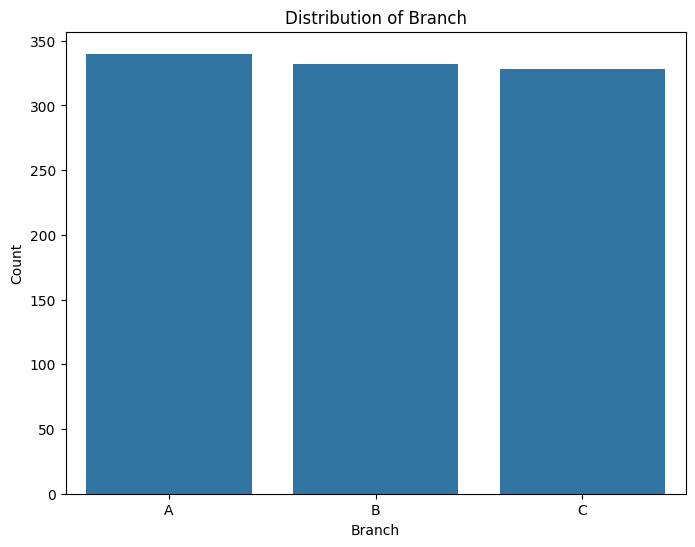

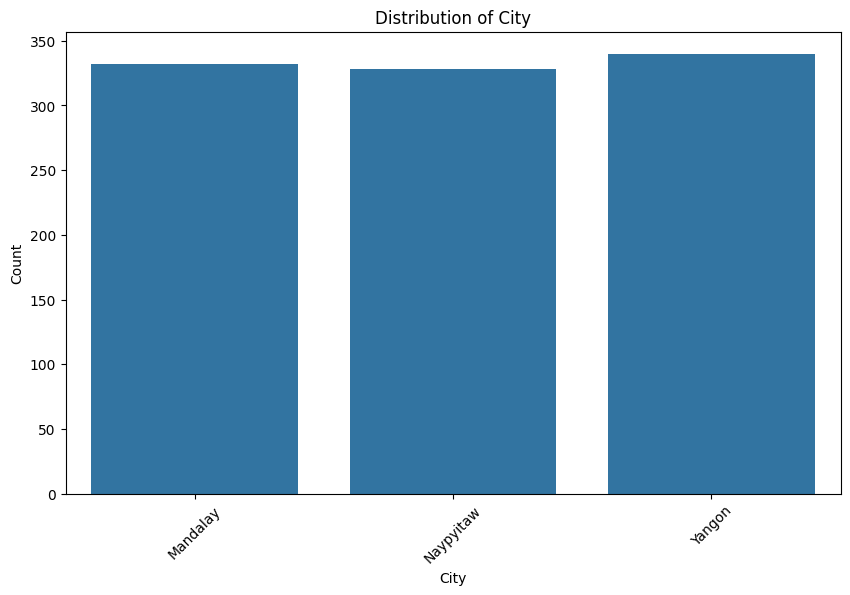

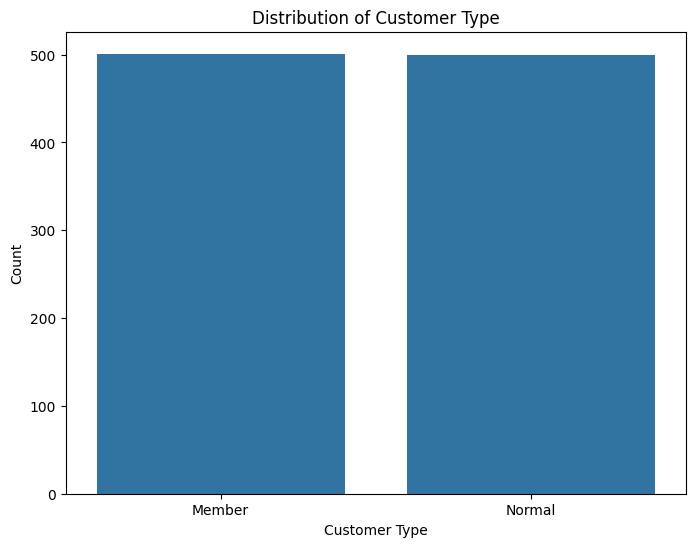

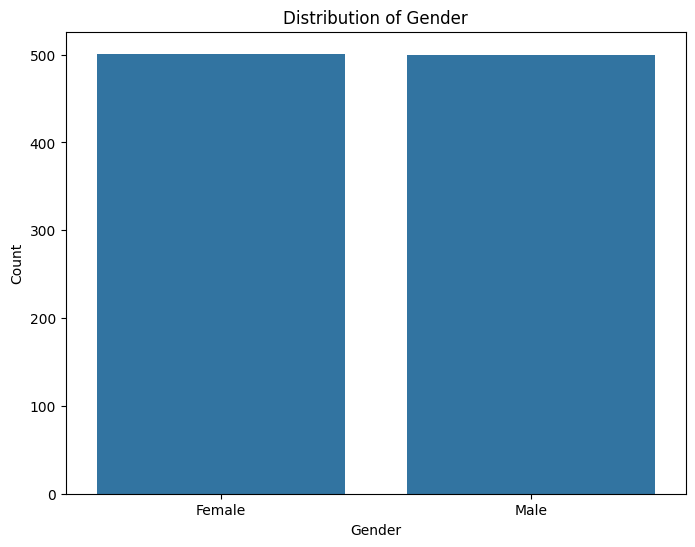

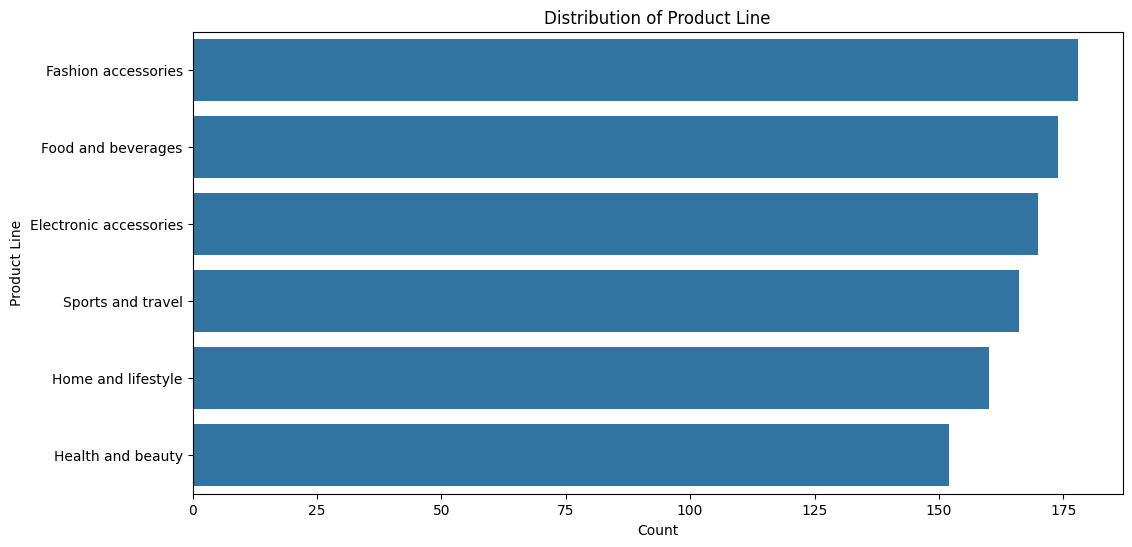

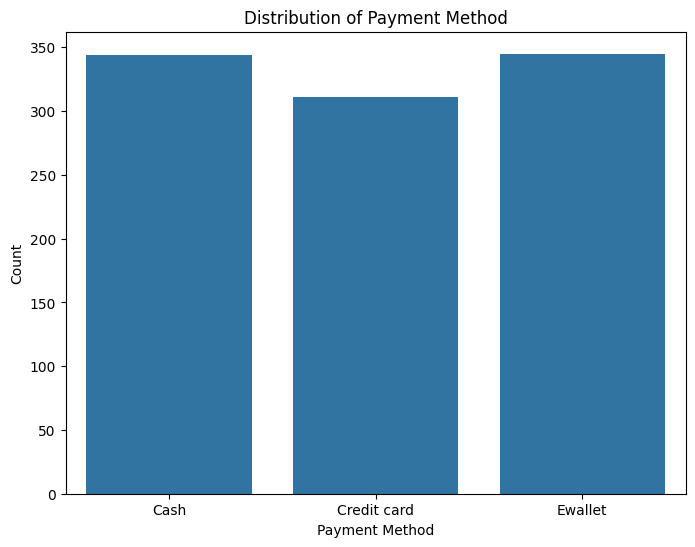

In [ ]:
# Visualize distribution of Branch
plt.figure(figsize=(8, 6))
sns.countplot(x='Branch', data=df)
plt.title('Distribution of Branch')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.show()

# Visualize distribution of City
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=df)
plt.title('Distribution of City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualize distribution of Customer type
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer type', data=df)
plt.title('Distribution of Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

# Visualize distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualize distribution of Product line
plt.figure(figsize=(12, 6))
sns.countplot(y='Product line', data=df, order=df['Product line'].value_counts().index)
plt.title('Distribution of Product Line')
plt.xlabel('Count')
plt.ylabel('Product Line')
plt.show()

# Visualize distribution of Payment
plt.figure(figsize=(8, 6))
sns.countplot(x='Payment', data=df)
plt.title('Distribution of Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


####**B-numerical data visualization(univariant analysis)**

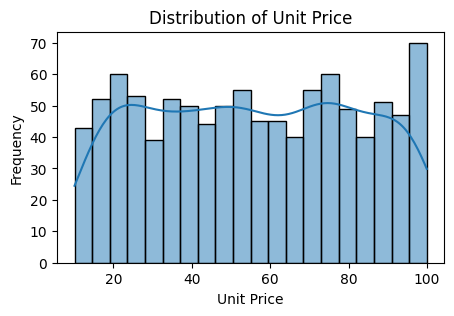

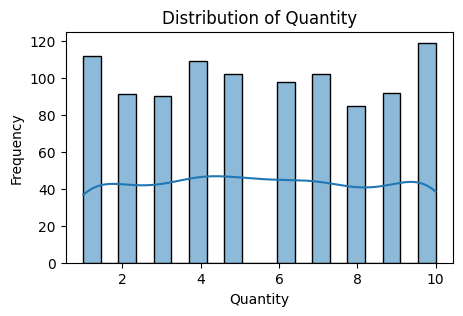

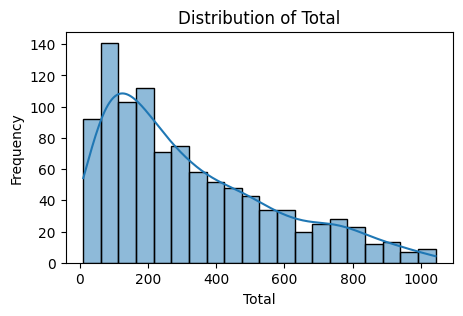

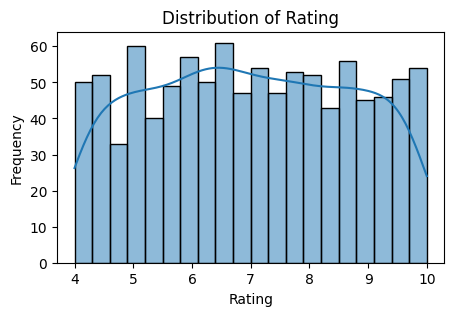

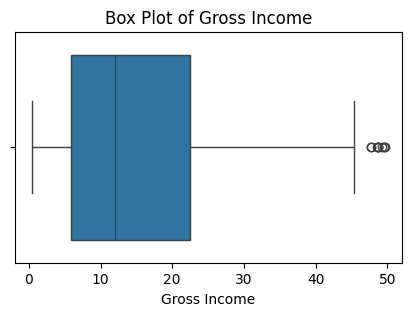

In [ ]:
# Visualize distribution of Unit price
plt.figure(figsize=(5, 3))
sns.histplot(df['Unit price'], bins=20, kde=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

# Visualize distribution of Quantity
plt.figure(figsize=(5, 3))
sns.histplot(df['Quantity'], bins=20, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Visualize distribution of Total
plt.figure(figsize=(5, 3))
sns.histplot(df['Total'], bins=20, kde=True)
plt.title('Distribution of Total')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.show()

# Visualize distribution of Rating
plt.figure(figsize=(5, 3))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Visualize box plot of Gross income
plt.figure(figsize=(5, 3))
sns.boxplot(x='gross income',data=df)
plt.title('Box Plot of Gross Income')
plt.xlabel('Gross Income')
plt.show()

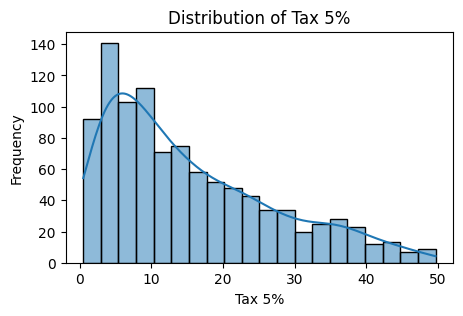

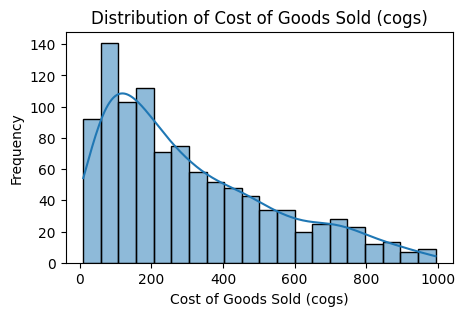

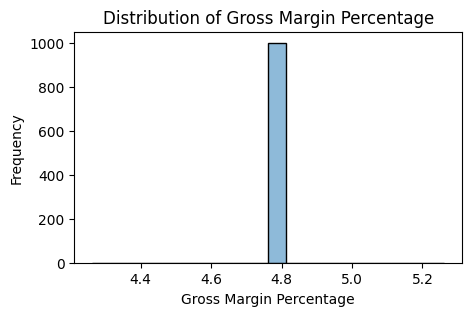

In [ ]:
# Visualize distribution of Tax 5%
plt.figure(figsize=(5, 3))
sns.histplot(df['Tax 5%'], bins=20, kde=True)
plt.title('Distribution of Tax 5%')
plt.xlabel('Tax 5%')
plt.ylabel('Frequency')
plt.show()

# Visualize distribution of Cost of Goods Sold (cogs)
plt.figure(figsize=(5, 3))
sns.histplot(df['cogs'], bins=20, kde=True)
plt.title('Distribution of Cost of Goods Sold (cogs)')
plt.xlabel('Cost of Goods Sold (cogs)')
plt.ylabel('Frequency')
plt.show()

# Visualize distribution of Gross margin percentage
plt.figure(figsize=(5, 3))
sns.histplot(df['gross margin percentage'], bins=20, kde=True)
plt.title('Distribution of Gross Margin Percentage')
plt.xlabel('Gross Margin Percentage')
plt.ylabel('Frequency')
plt.show()

####**C- Bivariant analysis**

####**Product Attributes:**

####Product line
####Unit price
####Quantity

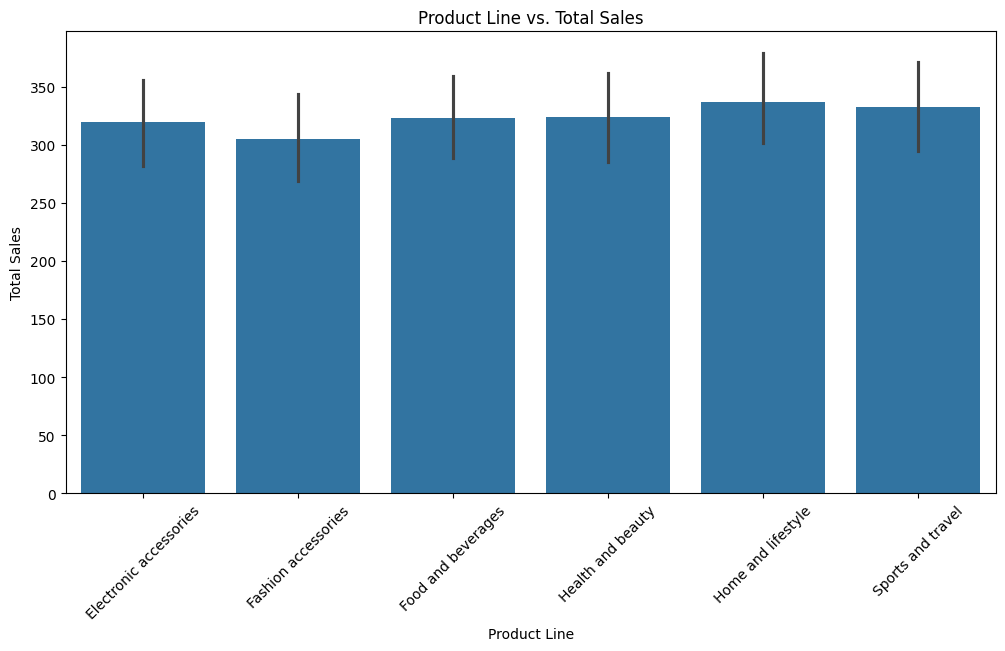

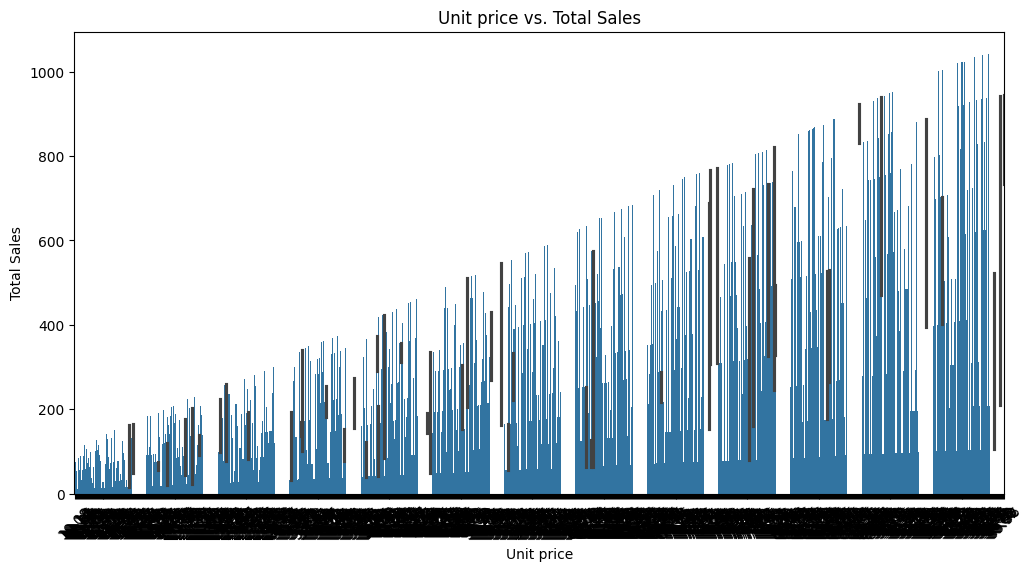

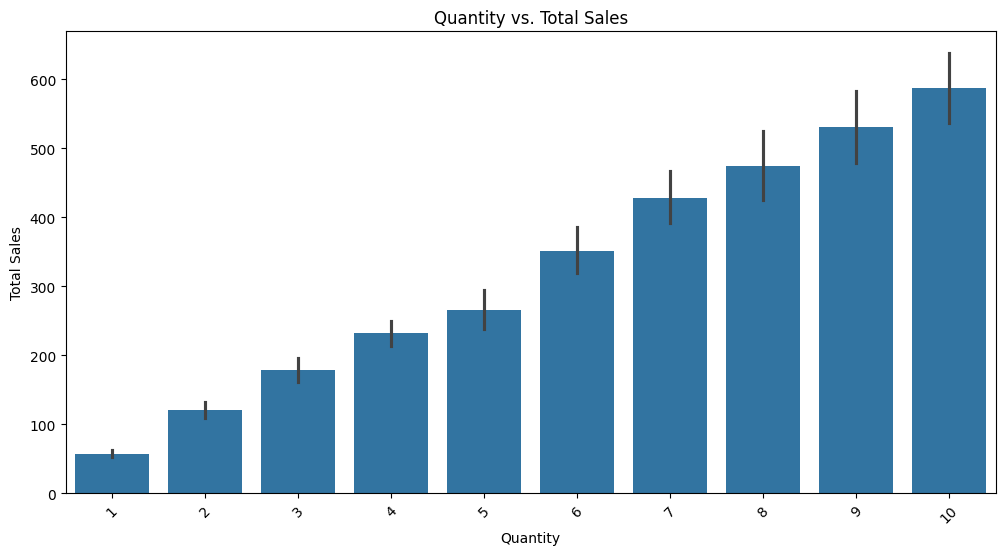

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Total', data=df)
plt.title('Product Line vs. Total Sales')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Unit price', y='Total', data=df)
plt.title('Unit price vs. Total Sales')
plt.xlabel('Unit price')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Total', data=df)
plt.title('Quantity vs. Total Sales')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

###**Store Location:**
####Branch
####City

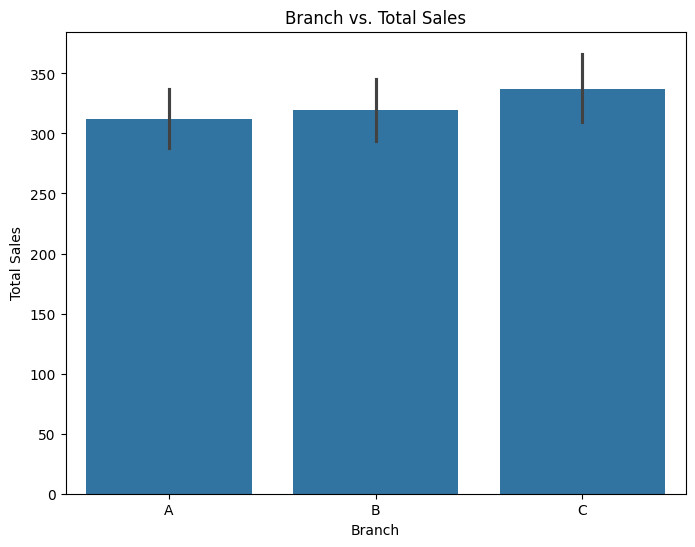

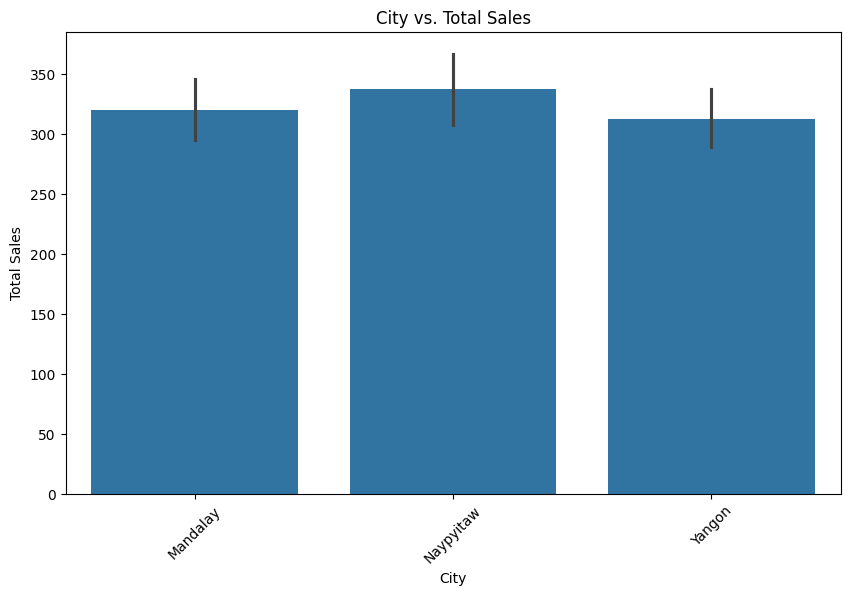

In [ ]:
# Branch vs. Total Sales
plt.figure(figsize=(8, 6))
sns.barplot(x='Branch', y='Total', data=df)
plt.title('Branch vs. Total Sales')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

# City vs. Total Sales
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Total', data=df)
plt.title('City vs. Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

####**customer**
####type
####gender
####payment

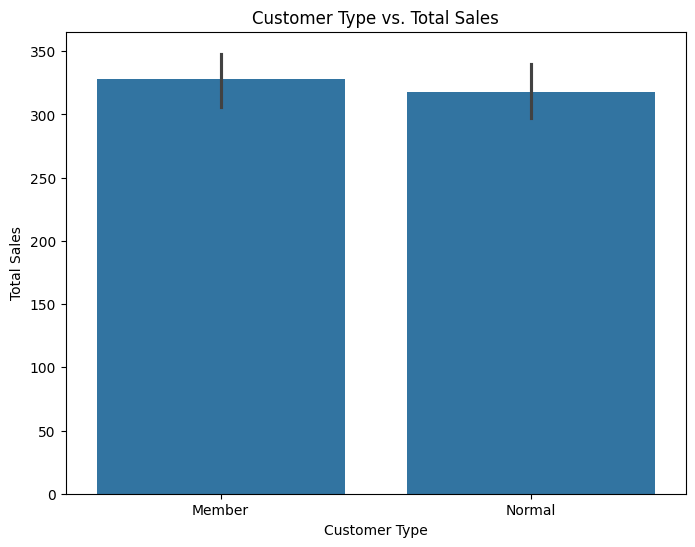

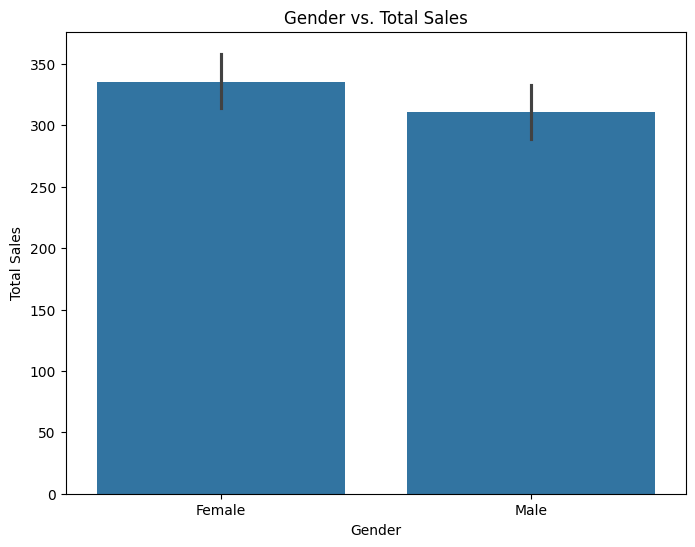

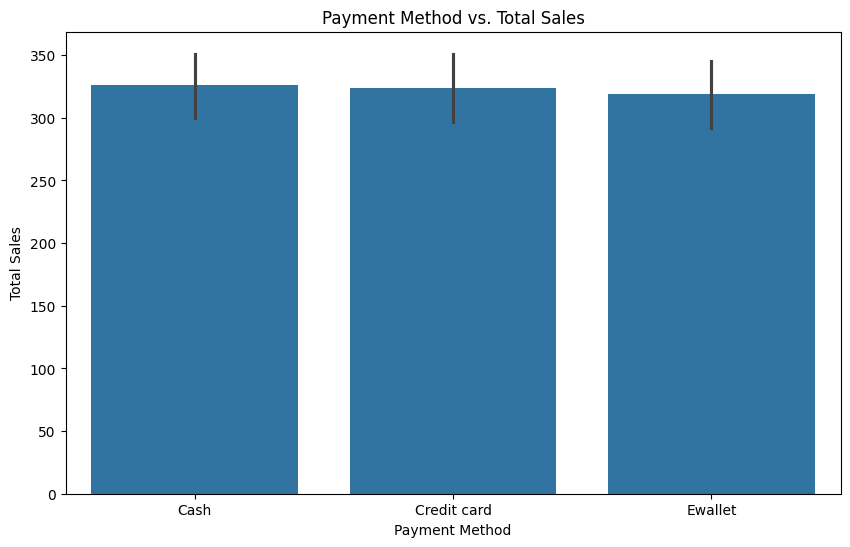

In [ ]:
# Customer Type vs. Total Sales
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer type', y='Total', data=df)
plt.title('Customer Type vs. Total Sales')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()

# Gender vs. Total Sales
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Total', data=df)
plt.title('Gender vs. Total Sales')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

# Payment Method vs. Total Sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment', y='Total', data=df)
plt.title('Payment Method vs. Total Sales')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()


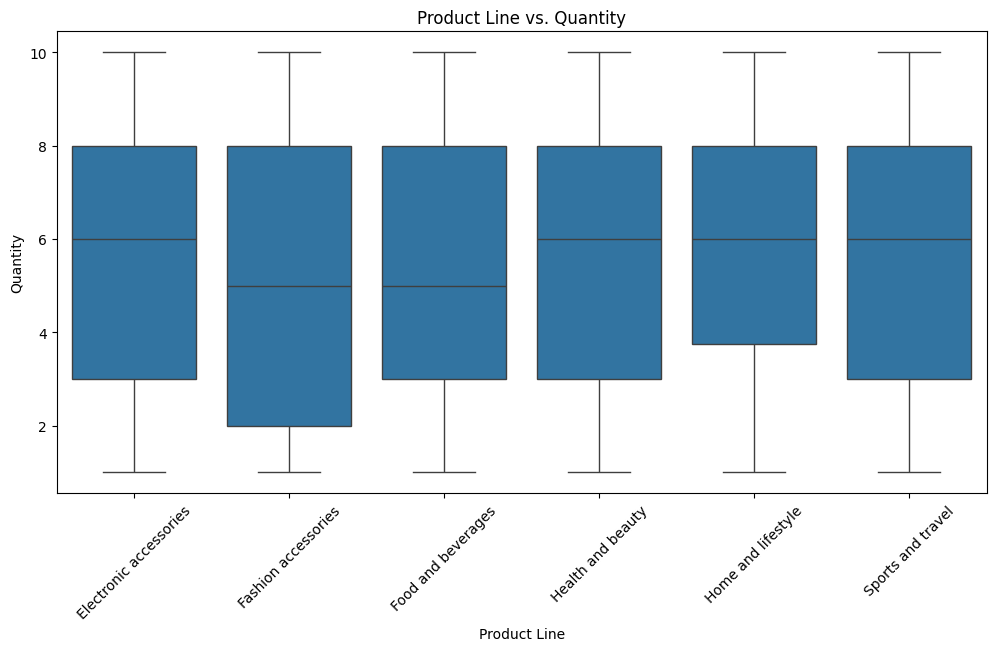

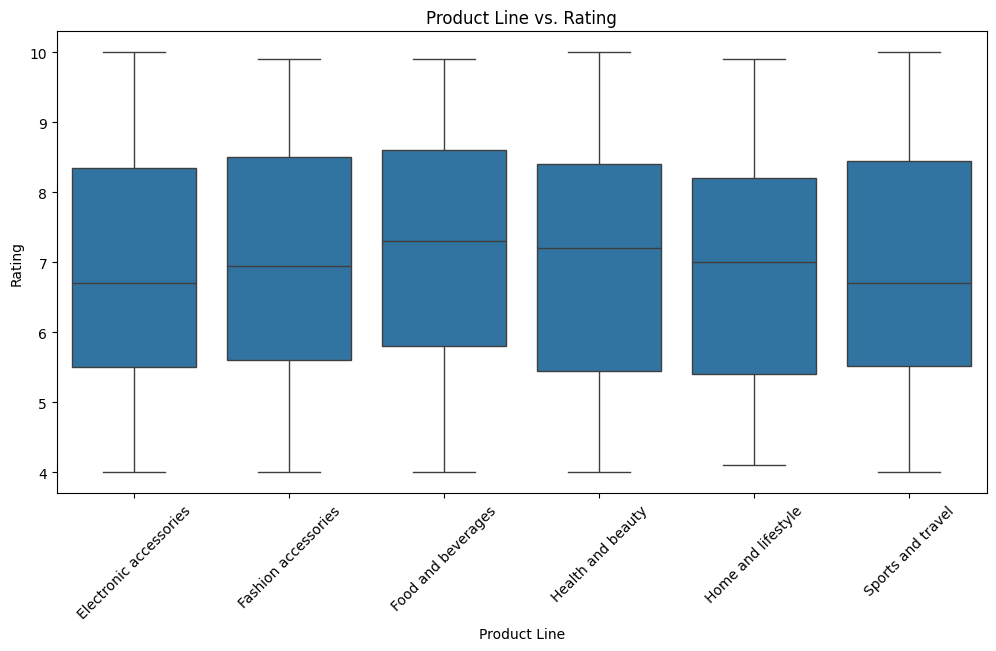

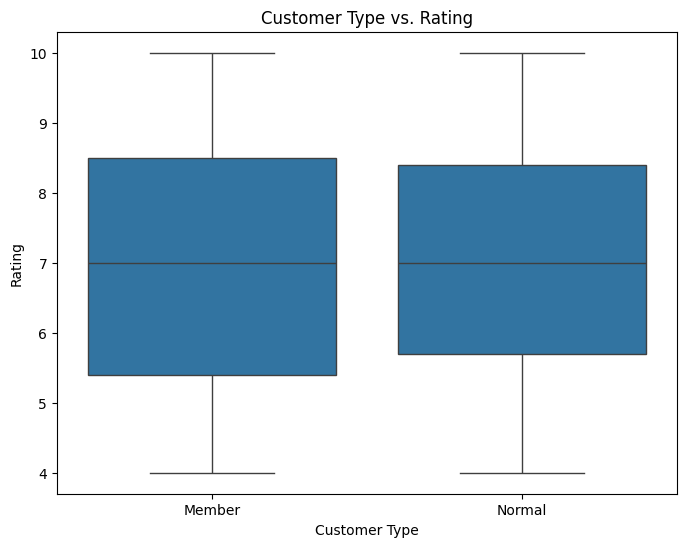

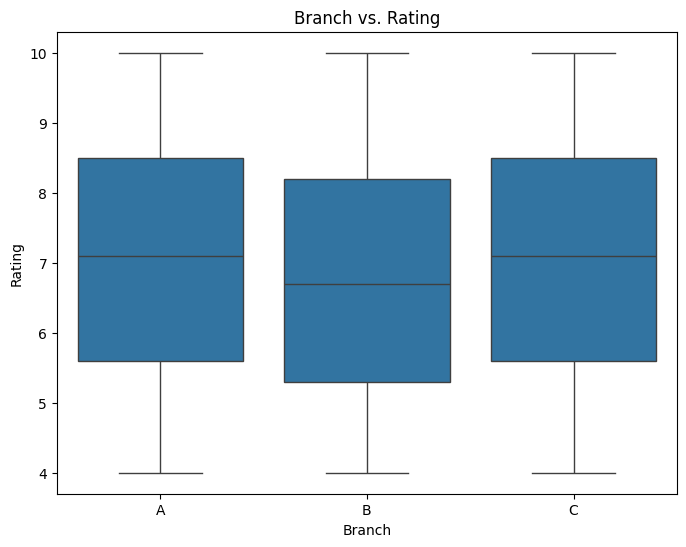

In [ ]:
# Product Line vs. Quantity
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product line', y='Quantity', data=df)
plt.title('Product Line vs. Quantity')
plt.xlabel('Product Line')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

# Product Line vs. Rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product line', y='Rating', data=df)
plt.title('Product Line vs. Rating')
plt.xlabel('Product Line')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# Customer Type vs. Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer type', y='Rating', data=df)
plt.title('Customer Type vs. Rating')
plt.xlabel('Customer Type')
plt.ylabel('Rating')
plt.show()

# Branch vs. Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='Branch', y='Rating', data=df)
plt.title('Branch vs. Rating')
plt.xlabel('Branch')
plt.ylabel('Rating')
plt.show()


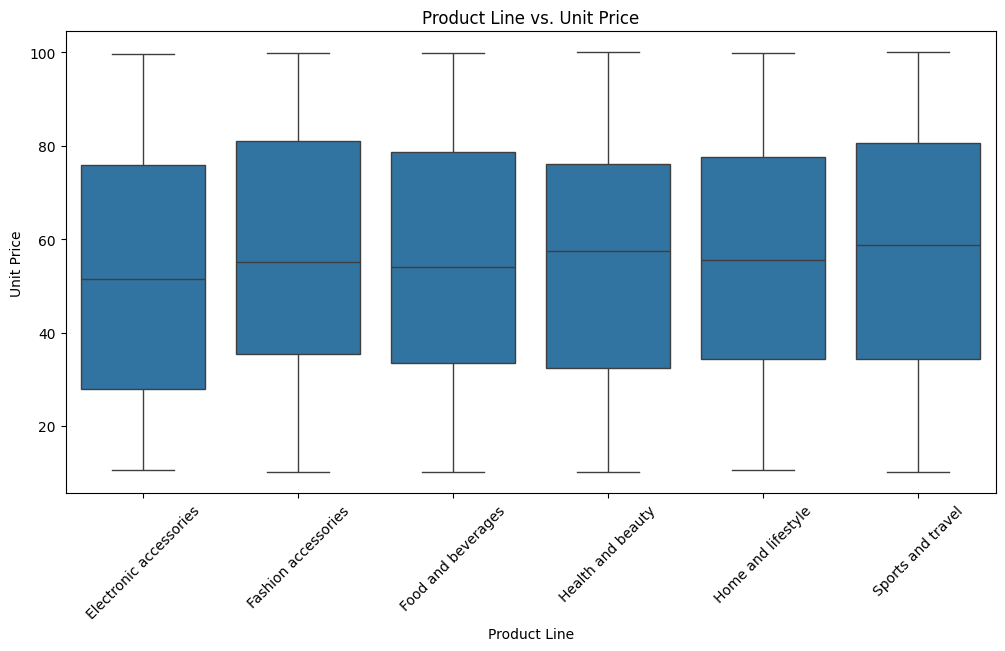

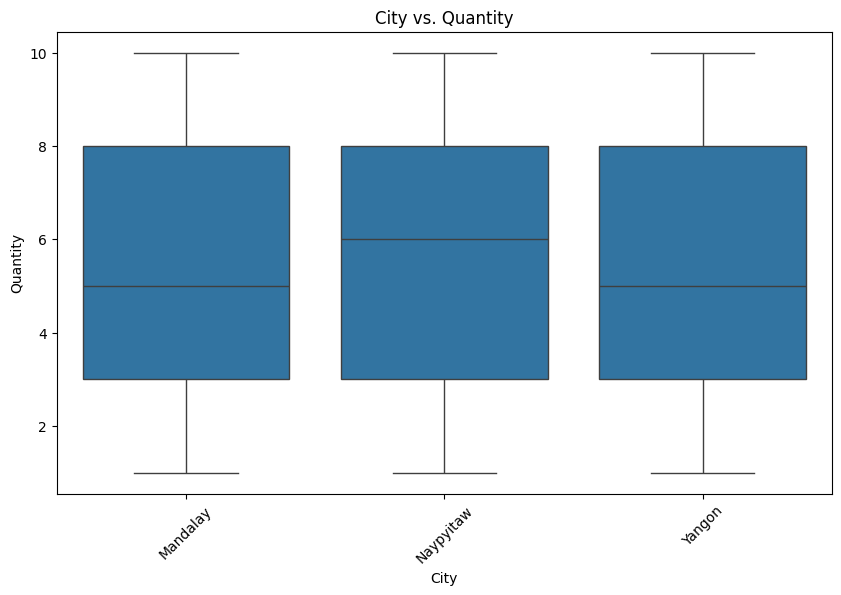

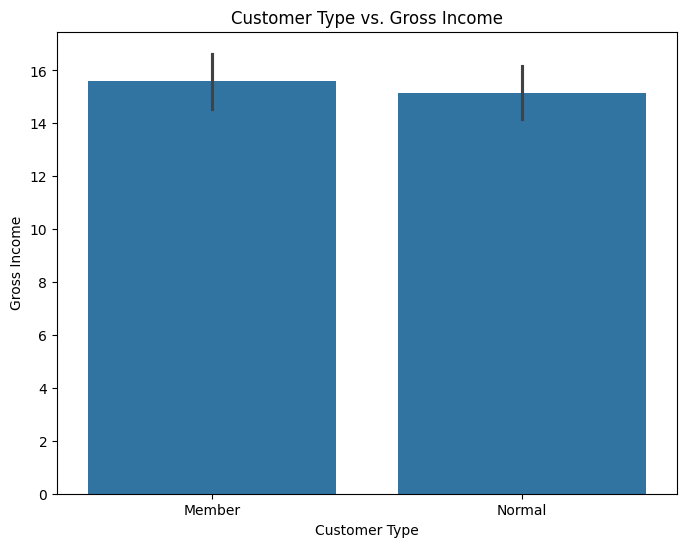

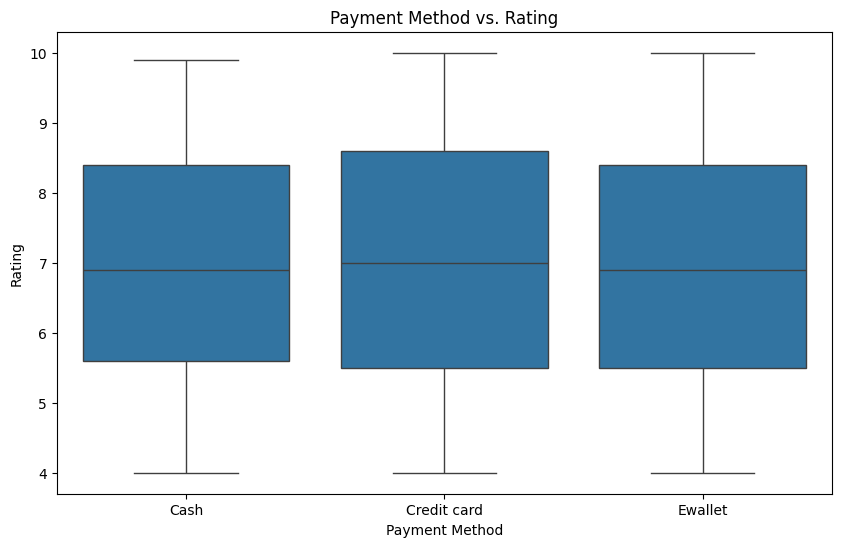

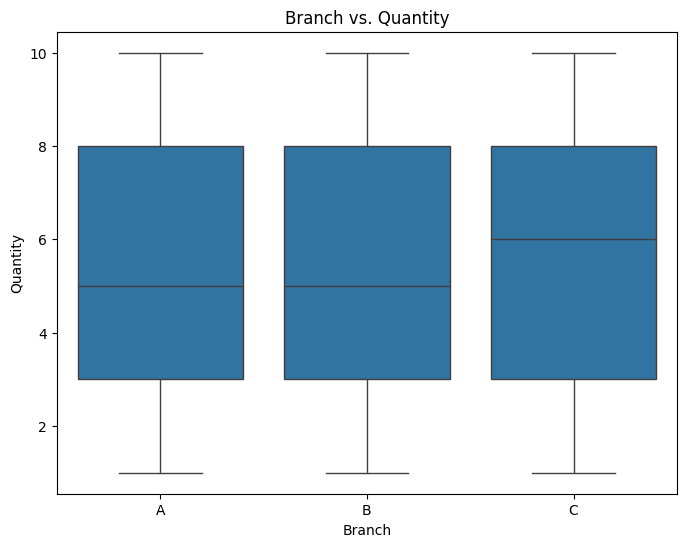

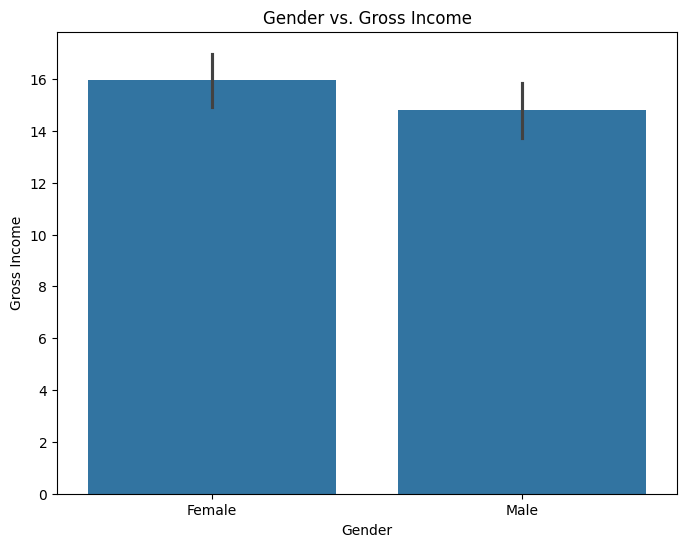

In [ ]:

# Product Line vs. Unit Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product line', y='Unit price', data=df)
plt.title('Product Line vs. Unit Price')
plt.xlabel('Product Line')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.show()

# City vs. Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Quantity', data=df)
plt.title('City vs. Quantity')
plt.xlabel('City')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

# Customer Type vs. Gross Income
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer type', y='gross income', data=df)
plt.title('Customer Type vs. Gross Income')
plt.xlabel('Customer Type')
plt.ylabel('Gross Income')
plt.show()

# Payment Method vs. Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment', y='Rating', data=df)
plt.title('Payment Method vs. Rating')
plt.xlabel('Payment Method')
plt.ylabel('Rating')
plt.show()

# Branch vs. Quantity
plt.figure(figsize=(8, 6))
sns.boxplot(x='Branch', y='Quantity', data=df)
plt.title('Branch vs. Quantity')
plt.xlabel('Branch')
plt.ylabel('Quantity')
plt.show()

# Gender vs. Gross Income
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='gross income', data=df)
plt.title('Gender vs. Gross Income')
plt.xlabel('Gender')
plt.ylabel('Gross Income')
plt.show()


##**6-Feature extraction**

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract date features
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
df['Time']

0      13:08
1      10:29
2      13:23
3      20:33
4      10:37
       ...  
995    13:46
996    17:16
997    13:22
998    15:33
999    13:28
Name: Time, Length: 1000, dtype: object

In [ ]:
df['Time'] = df['Time'].astype(str)

In [ ]:
df['Time']

0      13:08
1      10:29
2      13:23
3      20:33
4      10:37
       ...  
995    13:46
996    17:16
997    13:22
998    15:33
999    13:28
Name: Time, Length: 1000, dtype: object

In [ ]:
df['Hour'] = df['Time'].str.split(':').str[0].astype(int)

In [ ]:
df['Hour']

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: Hour, Length: 1000, dtype: int64

In [ ]:
df['Year'].value_counts()

Year
2019    1000
Name: count, dtype: int64

In [ ]:
df['Month'].value_counts()

Month
1    352
3    345
2    303
Name: count, dtype: int64

these supermarket data was recorded in 1st 3 months of 2019

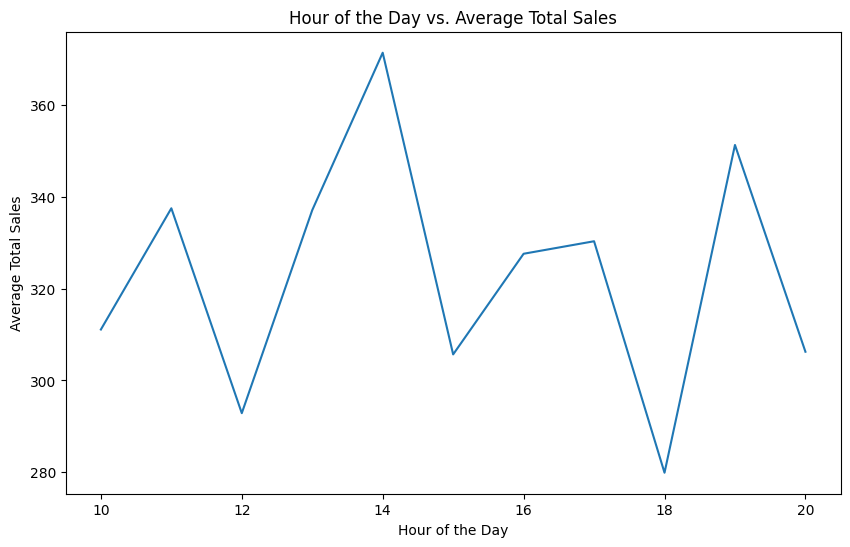

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Total', data=df, estimator='mean', ci=None)
plt.title('Hour of the Day vs. Average Total Sales')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Total Sales')
plt.show()

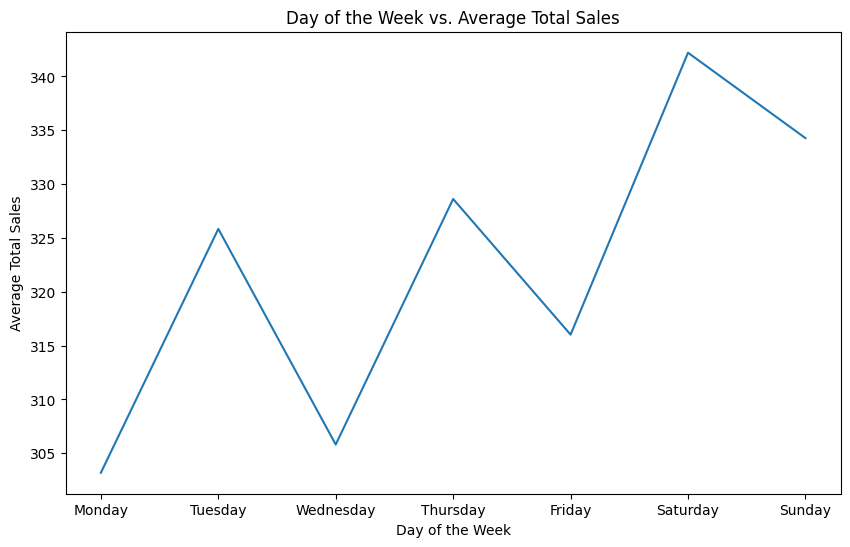

In [ ]:
# Line plot of Day of the Week vs. Average Total Sales
plt.figure(figsize=(10, 6))
sns.lineplot(x='DayOfWeek', y='Total', data=df, estimator='mean', ci=None)
plt.title('Day of the Week vs. Average Total Sales')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Sales')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Set x-axis ticks to represent days of the week
plt.show()

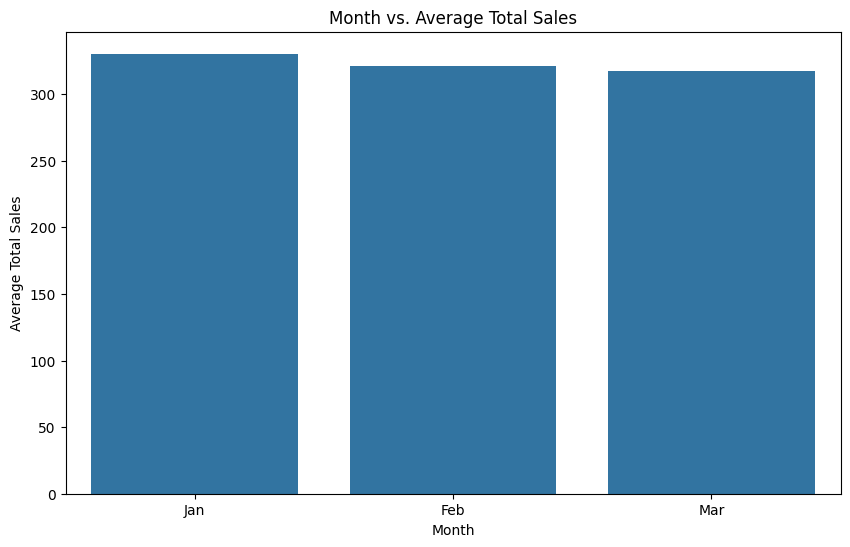

In [ ]:
# Bar plot of Month vs. Average Total Sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total', data=df, estimator='mean', ci=None)
plt.title('Month vs. Average Total Sales')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')
plt.xticks(range(3), ['Jan', 'Feb', 'Mar'])  # Set x-axis ticks to represent months
plt.show()


In [ ]:
# Group by 'Product line' and sum up the 'Total' column
revenue_per_product_line = df.groupby('Product line')['Total'].sum().reset_index()
revenue_per_product_line.columns = ['Product line', 'TotalRevenue']

# Display the total revenue generated per product line
print(revenue_per_product_line)

             Product line  TotalRevenue
0  Electronic accessories    54337.5315
1     Fashion accessories    54305.8950
2      Food and beverages    56144.8440
3       Health and beauty    49193.7390
4      Home and lifestyle    53861.9130
5       Sports and travel    55122.8265


Average Transaction Amount per Hour:

In [ ]:
avg_transaction_amount_per_hour = df.groupby('Hour')['Total'].mean().reset_index()
avg_transaction_amount_per_hour.columns = ['Hour', 'AvgTransactionAmount']
print(avg_transaction_amount_per_hour)

    Hour  AvgTransactionAmount
0     10            311.103772
1     11            337.525883
2     12            292.875084
3     13            337.118709
4     14            371.426494
5     15            305.681456
6     16            327.614591
7     17            330.340784
8     18            279.896129
9     19            351.323124
10    20            306.260360


Total Sales per Product and Gender:

In [ ]:
total_sales_per_product_gender = df.groupby(['Product line', 'Gender'])['Total'].sum().reset_index()
total_sales_per_product_gender.columns = ['Product line', 'Gender', 'TotalSales']
total_sales_per_product_gender

,Product line,Gender,TotalSales
0,Electronic accessories,Female,27102.0225
1,Electronic accessories,Male,27235.5090
2,Fashion accessories,Female,30437.4000
3,Fashion accessories,Male,23868.4950
4,Food and beverages,Female,33170.9175
5,Food and beverages,Male,22973.9265
6,Health and beauty,Female,18560.9865
7,Health and beauty,Male,30632.7525
8,Home and lifestyle,Female,30036.8775
9,Home and lifestyle,Male,23825.0355


from matplotlib import pyplot as plt
total_sales_per_product_gender['TotalSales'].plot(kind='hist', bins=20, title='TotalSales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
total_sales_per_product_gender['TotalSales'].plot(kind='line', figsize=(8, 4), title='TotalSales')
plt.gca().spines[['top', 'right']].set_visible(False)

Total Sales per Customer and Payment Method:

---



In [ ]:
total_sales_per_customer_payment = df.groupby(['Customer type', 'Payment'])['Total'].sum().reset_index()
total_sales_per_customer_payment.columns = ['Customer type', 'Payment', 'TotalSales']
total_sales_per_customer_payment

,Customer type,Payment,TotalSales
0,Member,Cash,54661.0155
1,Member,Credit card,57771.4725
2,Member,Ewallet,51790.9560
3,Normal,Cash,57545.5545
4,Normal,Credit card,42995.5995
5,Normal,Ewallet,58202.1510


Average Rating per Product and Branch:

In [ ]:
avg_rating_per_product_branch = df.groupby(['Product line', 'Branch'])['Rating'].mean().reset_index()
avg_rating_per_product_branch.columns = ['Product line', 'Branch', 'AvgRating']
avg_rating_per_product_branch

,Product line,Branch,AvgRating
0,Electronic accessories,A,6.911667
1,Electronic accessories,B,7.116364
2,Electronic accessories,C,6.747273
3,Fashion accessories,A,6.878431
4,Fashion accessories,B,6.722581
5,Fashion accessories,C,7.440000
6,Food and beverages,A,7.253448
7,Food and beverages,B,6.994000
8,Food and beverages,C,7.080303
9,Health and beauty,A,6.900000


##**7- Data Encoding**

In [ ]:
#data encoding for categorical columns using onehotencoder

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.6 MB/s eta 0:00:00


In [ ]:
from category_encoders import OneHotEncoder

In [ ]:
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
ohe =OneHotEncoder(cols=categorical_cols, use_cat_names=False)
df1= ohe.fit_transform(df)
df1

,Invoice ID,Branch_1,Branch_2,Branch_3,City_1,City_2,City_3,Customer type_1,Customer type_2,Gender_1,Gender_2,Product line_1,Product line_2,Product line_3,Product line_4,Product line_5,Product line_6,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment_1,Payment_2,Payment_3,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,Year,Hour
0,750-67-8428,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,74.69,7,26.1415,548.9715,2019-01-05,13:08,1,0,0,522.83,4.761905,26.1415,9.1,5,1,2019,13
1,226-31-3081,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,15.28,5,3.8200,80.2200,2019-03-08,10:29,0,1,0,76.40,4.761905,3.8200,9.6,4,3,2019,10
2,631-41-3108,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,46.33,7,16.2155,340.5255,2019-03-03,13:23,0,0,1,324.31,4.761905,16.2155,7.4,6,3,2019,13
3,123-19-1176,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,58.22,8,23.2880,489.0480,2019-01-27,20:33,1,0,0,465.76,4.761905,23.2880,8.4,6,1,2019,20
4,373-73-7910,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,86.31,7,30.2085,634.3785,2019-02-08,10:37,1,0,0,604.17,4.761905,30.2085,5.3,4,2,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,40.35,1,2.0175,42.3675,2019-01-29,13:46,1,0,0,40.35,4.761905,2.0175,6.2,1,1,2019,13
996,303-96-2227,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,97.38,10,48.6900,1022.4900,2019-03-02,17:16,1,0,0,973.80,4.761905,48.6900,4.4,5,3,2019,17
997,727-02-1313,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,31.84,1,1.5920,33.4320,2019-02-09,13:22,0,1,0,31.84,4.761905,1.5920,7.7,5,2,2019,13
998,347-56-2442,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,65.82,1,3.2910,69.1110,2019-02-22,15:33,0,1,0,65.82,4.761905,3.2910,4.1,4,2,2019,15


In [ ]:
df1 = df1.drop(['Invoice ID','Time','Year'], axis=1)
df2 = df1.drop(['DayOfWeek','Month','Hour'], axis=1)

KeyError: "['Invoice ID'] not found in axis"

In [ ]:
df1=df1.drop(['Date','Time','Year'],axis=1)

In [ ]:
df2


,Branch_1,Branch_2,Branch_3,City_1,City_2,City_3,Customer type_1,Customer type_2,Gender_1,Gender_2,Product line_1,Product line_2,Product line_3,Product line_4,Product line_5,Product line_6,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment_1,Payment_2,Payment_3,cogs,gross margin percentage,gross income,Rating
0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,74.69,7,26.1415,548.9715,2019-01-05,13:08,1,0,0,522.83,4.761905,26.1415,9.1
1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,15.28,5,3.8200,80.2200,2019-03-08,10:29,0,1,0,76.40,4.761905,3.8200,9.6
2,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,46.33,7,16.2155,340.5255,2019-03-03,13:23,0,0,1,324.31,4.761905,16.2155,7.4
3,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,58.22,8,23.2880,489.0480,2019-01-27,20:33,1,0,0,465.76,4.761905,23.2880,8.4
4,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,86.31,7,30.2085,634.3785,2019-02-08,10:37,1,0,0,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,40.35,1,2.0175,42.3675,2019-01-29,13:46,1,0,0,40.35,4.761905,2.0175,6.2
996,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,97.38,10,48.6900,1022.4900,2019-03-02,17:16,1,0,0,973.80,4.761905,48.6900,4.4
997,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,31.84,1,1.5920,33.4320,2019-02-09,13:22,0,1,0,31.84,4.761905,1.5920,7.7
998,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,65.82,1,3.2910,69.1110,2019-02-22,15:33,0,1,0,65.82,4.761905,3.2910,4.1


##**8-data splitting**

In [ ]:
# Splitting the data
X = df1.drop('Total', axis=1)
y = df1['Total'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

##**9-Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

#### Data is balanced
##**now, data is ready for model**

try many classification and tune them and choose best one

###logistic regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X contains the features and y contains the target variable (total sales)

# Initialize the linear regression model
linear_regressor = LinearRegression()

# Fit the model on the training data
linear_regressor.fit(X_train, y_train)

# Predict total sales on the testing data
y_pred_logreg = linear_regressor.predict(X_test)

# Evaluate the model
mse_logreg = mean_squared_error(y_test, y_pred_logreg)
r2_logreg = r2_score(y_test, y_pred_logreg)

print(f"Mean Squared Error: {mse_logreg}")
print(f"R-squared Score: {r2_logreg}")


Mean Squared Error: 0.09263245909721497
R-squared Score: 0.9999985761950488


###KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Predict total sales on the testing data
y_pred_knn = knn_regressor.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"Mean Squared Error: {mse_knn}")
print(f"R-squared Score: {r2_knn}")

Mean Squared Error: 12173.928333333333
R-squared Score: 0.8128809317480652


###RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_reg = rf_regressor.predict(X_test)

# Calculate Mean Squared Error
mse_reg = mean_squared_error(y_test, y_pred_reg)

# Calculate R-squared score
r2_reg = r2_score(y_test, y_pred_reg)

print("Mean Squared Error (MSE):", mse_reg)
print("R-squared Score:", r2_reg)

Mean Squared Error (MSE): 1.774669500000005
R-squared Score: 0.9999727224857743


In [ ]:
result_df = pd.DataFrame({
    'Model': ['logreg', 'knn', 'rf'],
   'Mean Squared Error (MSE)': [mse_logreg, mse_knn, mse_reg],
   'R-squared Score': [r2_logreg, r2_knn, r2_reg] })
result_df = result_df.sort_values(by='R-squared Score', ascending=False)
result_df = result_df.set_index('Model')

In [ ]:
result_df

,Mean Squared Error (MSE),R-squared Score
Model,,
logreg,0.092632,0.999999
rf,1.774670,0.999973
knn,12173.928333,0.812881


###feature importance

In [ ]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

Top 10 Most Important Features:
            Feature  Importance
22             cogs    0.358742
18           Tax 5%    0.342939
24     gross income    0.298231
16       Unit price    0.000029
25           Rating    0.000008
20        Payment_2    0.000005
28             Hour    0.000005
7   Customer type_2    0.000005
26        DayOfWeek    0.000005
27            Month    0.000004


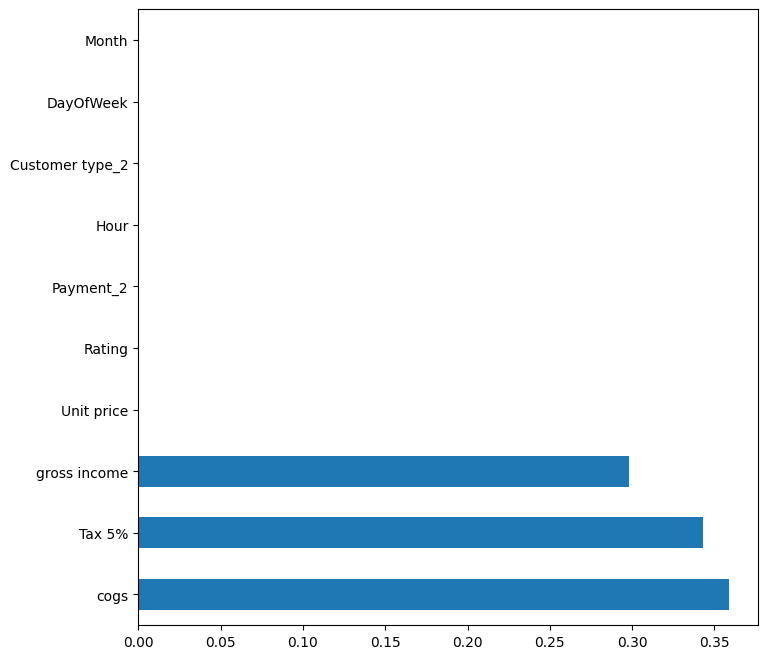

In [ ]:
feat_imp = pd.Series(rf_regressor.feature_importances_, index=X.columns)
plt.figure(figsize=(8,8))
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

Based on the feature importance analysis from the model, we can derive several actionable insights and recommendations for stakeholders:

Cost of Goods Sold (COGS): The most important feature influencing supermarket sales is the cost of goods sold (COGS). This suggests that optimizing procurement processes, negotiating better prices with suppliers, or finding alternative suppliers with lower costs could positively impact profitability.
Tax 5%: The second most important feature is the tax applied to the sales. This implies that understanding and managing tax implications effectively can have a significant influence on sales performance and overall revenue.
Gross Income: The gross income generated from sales is another crucial factor affecting overall sales. Strategies aimed at increasing gross income, such as implementing effective pricing strategies or promoting higher-margin products, could lead to improved sales outcomes.
Unit Price and Rating: While these features have relatively low importance compared to others, they still contribute to the model's predictions. Monitoring and optimizing product pricing based on customer ratings and feedback could help enhance customer satisfaction and drive sales.
Payment Method: Although Payment_2 (assuming it represents a specific payment method) has low importance, exploring payment preferences of customers and ensuring convenient payment options could positively impact sales conversion rates.
Time Factors: The features related to time, such as Hour, DayOfWeek, and Month, have minimal importance according to the model. However, it's still essential to analyze sales trends over different time periods to identify peak sales hours/days and seasonality patterns. Adjusting staffing levels, promotions, and inventory management strategies based on these insights can optimize sales performance.
In summary, stakeholders should focus on optimizing procurement processes to reduce COGS, managing taxes efficiently, and implementing pricing strategies to increase gross income. Additionally, paying attention to customer feedback, preferences, and convenience in payment methods can enhance overall customer satisfaction and drive repeat business. Finally, analyzing sales trends over time can help in planning promotions and staffing levels effectively to maximize sales opportunities.

In [ ]:
# Splitting the data
X = df1.drop('Total', axis=1)
y = df1['Total'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data to be 3D for LSTM input (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
loss = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)

# Make predictions
predictions = model.predict(X_test_reshaped)


Epoch 1/100
25/25 [==============================] - 5s 39ms/step - loss: 160840.7500 - val_loss: 178684.3594
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 160242.6250 - val_loss: 177861.4062
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 159280.4062 - val_loss: 176637.1250
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 158002.4531 - val_loss: 175155.4375
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 156575.5625 - val_loss: 173654.1406
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 155205.2812 - val_loss: 172225.6562
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 153927.3906 - val_loss: 170943.8125
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 152774.5469 - val_loss: 169786.6875
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 151725.0938 - val_loss: 168724.1875
Epoch 10/100
25/25

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate dates for the next 3 months
date_range = pd.date_range(start='2024-05-01', end='2024-07-31', freq='D')

# Preprocess dates
future_data = pd.DataFrame({'date': date_range})
future_data['year'] = future_data['date'].dt.year
future_data['month'] = future_data['date'].dt.month
future_data['day'] = future_data['date'].dt.day
future_data['hour'] = 0  # Assuming sales predictions are made for the entire day
future_data.drop(columns=['date'], inplace=True)
# Assuming you have already scaled the features as required by your LSTM model

# Use the trained LSTM model to make predictions
predicted_sales = model.predict(future_data.values)  # Assuming 'model' is your trained LSTM model

# Plot the predicted sales over the next 3 months
plt.figure(figsize=(10, 6))
plt.plot(date_range, predicted_sales, color='blue', label='Predicted Sales')
plt.title('Predicted Sales for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 1, 29), found shape=(None, 4)
